<a href="https://colab.research.google.com/github/Avadhoot-Ganoo/CV_Expriments/blob/main/CV_LCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving images.jpg to images (3).jpg


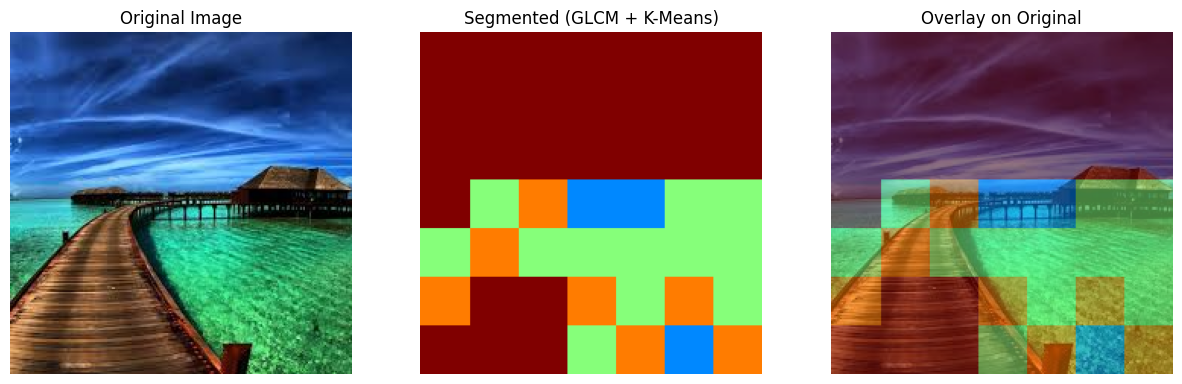

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size
patch_size = 32
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # Increase clusters for better segmentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert segmented result to color map
segmented_colored = cv2.applyColorMap((segmented * (255 // num_clusters)).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()


Saving images.jpg to images (4).jpg


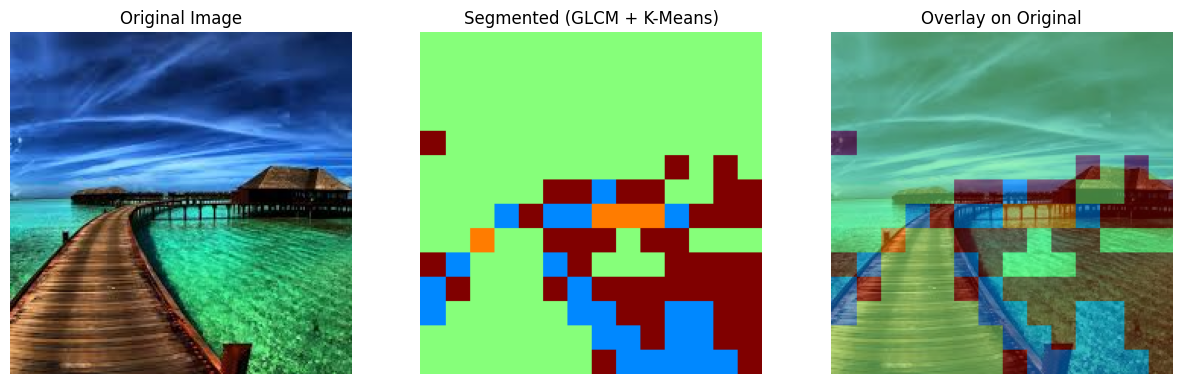

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size
patch_size = 16
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # Increase clusters for better segmentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert segmented result to color map
segmented_colored = cv2.applyColorMap((segmented * (255 // num_clusters)).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()


Saving images.jpg to images (6).jpg


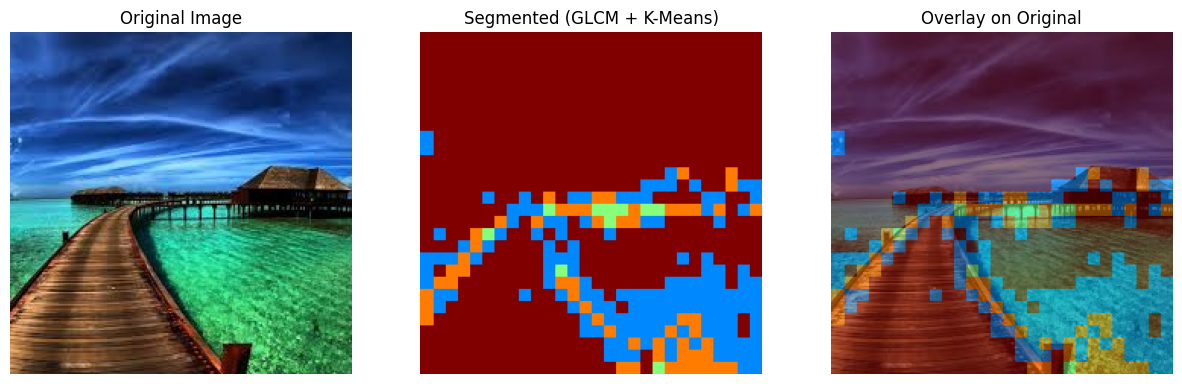

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size
patch_size = 8
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # Increase clusters for better segmentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert segmented result to color map
segmented_colored = cv2.applyColorMap((segmented * (255 // num_clusters)).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()


Saving images.jpg to images (7).jpg


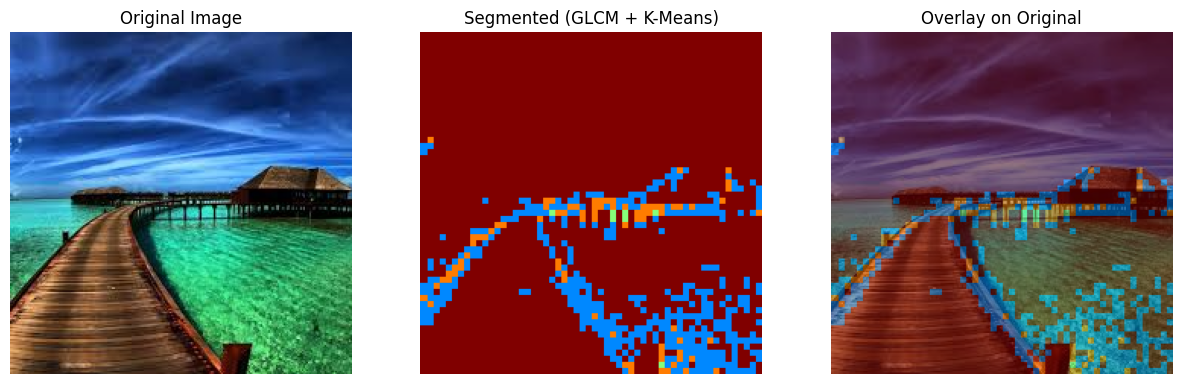

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size
patch_size = 4
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # Increase clusters for better segmentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert segmented result to color map
segmented_colored = cv2.applyColorMap((segmented * (255 // num_clusters)).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()


Saving images.jpg to images (8).jpg


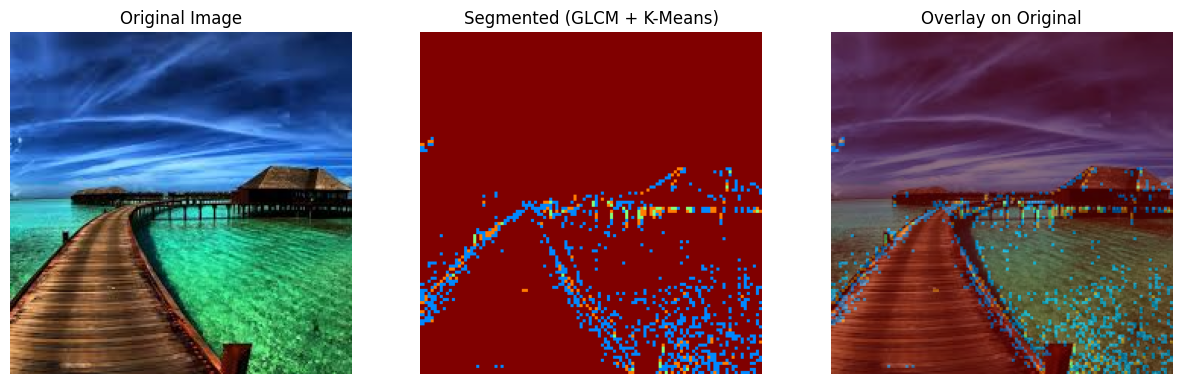

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size
patch_size = 2
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # Increase clusters for better segmentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Convert segmented result to color map
segmented_colored = cv2.applyColorMap((segmented * (255 // num_clusters)).astype(np.uint8), cv2.COLORMAP_JET)

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()


Saving images.jpg to images (11).jpg


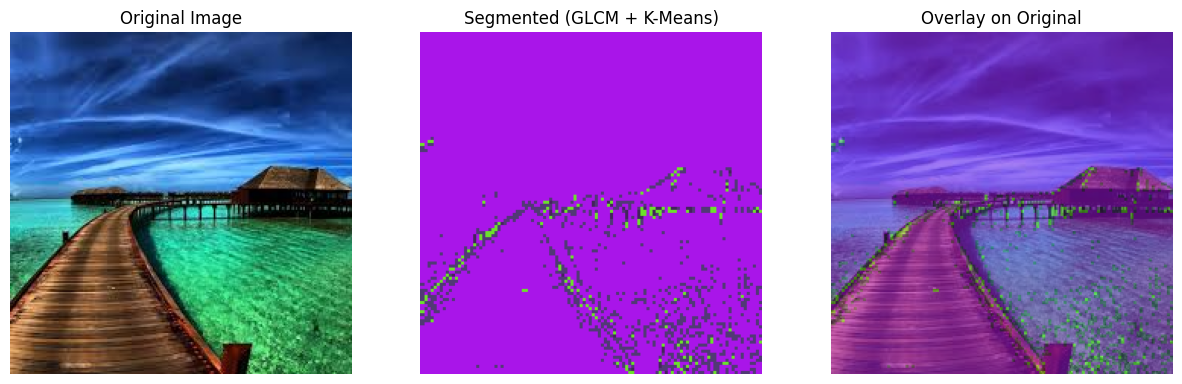

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.cluster import KMeans
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload and load image
uploaded = files.upload()
image = Image.open(BytesIO(list(uploaded.values())[0]))
image = np.array(image)  # Convert to NumPy array
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for GLCM

# Define patch size as 2x2
patch_size = 2
height, width, _ = image.shape
features = []

# Extract GLCM features from patches
for i in range(0, height, patch_size):
    for j in range(0, width, patch_size):
        patch = image_gray[i:i+patch_size, j:j+patch_size]
        if patch.shape == (patch_size, patch_size):
            glcm = graycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
            features.append([
                graycoprops(glcm, 'contrast')[0, 0],
                graycoprops(glcm, 'homogeneity')[0, 0],
                graycoprops(glcm, 'energy')[0, 0],
                graycoprops(glcm, 'correlation')[0, 0]
            ])

# Apply K-Means clustering
num_clusters = 4  # You can adjust this number for more or fewer segments
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(features)

# Reshape labels to match image dimensions
segmented = labels.reshape(height // patch_size, width // patch_size)
segmented = cv2.resize(segmented, (width, height), interpolation=cv2.INTER_NEAREST)

# Create a distinct color map for each segment
colors = np.random.randint(0, 255, (num_clusters, 3))  # Random colors for each cluster
segmented_colored = np.zeros((height, width, 3), dtype=np.uint8)

# Assign colors to the segmented regions
for i in range(num_clusters):
    segmented_colored[segmented == i] = colors[i]

# Overlay segmentation on the original image
blended = cv2.addWeighted(image, 0.5, segmented_colored, 0.5, 0)

# Show results
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image), plt.title("Original Image"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(segmented_colored), plt.title("Segmented (GLCM + K-Means)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(blended), plt.title("Overlay on Original"), plt.axis("off")
plt.show()
